# Set UP

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import joblib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
from sklearn.ensemble import RandomForestClassifier


#steam_data = pd.read_csv("steam_reviews.csv")

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
#steam_data_EN = steam_data[steam_data["language"] == "english"]
#steam_data.to_csv("steam_reviews_clean.csv")

In [4]:
# read the data
steam_data = pd.read_csv("steam_reviews_clean.csv")

In [5]:
steam_data.head()

,Unnamed: 0,app_id,app_name,review_id,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85184605,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,1,292030,The Witcher 3: Wild Hunt,85184171,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
2,2,292030,The Witcher 3: Wild Hunt,85184064,"dis gud,",1611379091,1611379091,True,0,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,3,292030,The Witcher 3: Wild Hunt,85180436,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
4,4,292030,The Witcher 3: Wild Hunt,85179753,Why wouldn't you get this,1611371978,1611371978,True,0,0,...,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09


# Goal: To make a classification model to predict the recommended by the individual review 

# Data Explore

In [6]:
steam_data.shape

(9635437, 22)

In [7]:
steam_data.dtypes

Unnamed: 0                          int64
app_id                              int64
app_name                           object
review_id                           int64
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful                       int64
votes_funny                         int64
weighted_vote_score               float64
comment_count                       int64
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
author.steamid                      int64
author.num_games_owned              int64
author.num_reviews                  int64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object

In [8]:
steam_data.isna().any()

Unnamed: 0                        False
app_id                            False
app_name                          False
review_id                         False
review                             True
timestamp_created                 False
timestamp_updated                 False
recommended                       False
votes_helpful                     False
votes_funny                       False
weighted_vote_score               False
comment_count                     False
steam_purchase                    False
received_for_free                 False
written_during_early_access       False
author.steamid                    False
author.num_games_owned            False
author.num_reviews                False
author.playtime_forever            True
author.playtime_last_two_weeks     True
author.playtime_at_review          True
author.last_played                 True
dtype: bool

In [9]:
steam_data.iloc[:,10:].describe()

,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,9.635437e+06,9.635437e+06,9.635437e+06,9.635437e+06,9.635437e+06,9.635435e+06,9.635435e+06,9.623590e+06,9.635435e+06
mean,1.688612e-01,1.344934e-01,7.656120e+16,1.369502e+06,4.564569e+05,1.635043e+04,1.612893e+02,9.140551e+03,1.577749e+09
std,2.416876e-01,2.045740e+00,2.985177e+08,2.454057e+09,1.416851e+09,4.088145e+04,7.665311e+02,2.646939e+04,5.244871e+07
min,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,7.656120e+16,3.100000e+01,2.000000e+00,1.258000e+03,0.000000e+00,5.860000e+02,1.567909e+09
50%,0.000000e+00,0.000000e+00,7.656120e+16,8.400000e+01,5.000000e+00,4.228000e+03,0.000000e+00,1.917000e+03,1.598706e+09
75%,4.820938e-01,0.000000e+00,7.656120e+16,1.920000e+02,1.100000e+01,1.446100e+04,0.000000e+00,6.860000e+03,1.608955e+09
max,9.904401e-01,1.432000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.375400e+04,3.228103e+06,1.611433e+09


# Clean Data

## drop the duplicated review by ['author.steamid', 'app_name']

In [10]:
steam_data.drop_duplicates(subset=['author.steamid', 'app_name', 'review'],inplace=True)

## drop the NA in the review

In [11]:
steam_data.dropna(subset = "review",inplace= True)

In [12]:
# the number of reviews done by each author

steam_data.groupby(by = "author.steamid").size().nlargest(10)

index_top10_reviewID = steam_data.groupby(by = "author.steamid").size().nlargest(10).index

author.steamid
76561198062813911    148
76561198315585536    131
76561198045381877    102
76561198064946151     99
76561197969749884     88
76561197997059777     81
76561197990947284     79
76561198011965365     79
76561197999920602     78
76561198048086581     78
dtype: int64

In [13]:
# for the top 10 reveiw, how many games are they playing
top10_reviewers = steam_data[steam_data["author.steamid"].isin(index_top10_reviewID)]
top10_reviewers.groupby(by = ["author.steamid"]).apply(lambda x : len(x.app_name))

author.steamid
76561197969749884     88
76561197990947284     79
76561197997059777     81
76561197999920602     78
76561198011965365     79
76561198045381877    102
76561198048086581     78
76561198062813911    148
76561198064946151     99
76561198315585536    131
dtype: int64

In [14]:
# the number of review for certain game and author
steam_data.groupby(by = ["author.steamid","app_name"]).size().nlargest(10)

author.steamid     app_name                            
76561197990747089  Outlast                                 3
76561198022657933  The Binding of Isaac: Rebirth           3
76561198030980450  Total War: ROME II - Emperor Edition    3
76561198032527776  PAYDAY 2                                3
76561198094789448  Subnautica                              3
76561197974340402  Fallout 4                               2
76561197991045131  Axiom Verge                             2
76561197995899157  The Walking Dead                        2
76561197997205958  The Witcher 3: Wild Hunt                2
76561198001416910  ARK: Survival Evolved                   2
dtype: int64

In [15]:
# The number of the game in review

print("The number of the game in review "+ str(len(steam_data.app_name.unique() )) )
print("Totaol number of the review "+ str(len(steam_data) ))  
print("The number of author who write review "+ str(len(steam_data["author.steamid"].unique())) ) 



The number of the game in review 315
Totaol number of the review 9563754
The number of author who write review 5280520


## drop NA in author.playtime_forever

In [16]:
steam_data["author.playtime_forever"].isna().sum()

2

In [17]:
steam_data.dropna(subset = "author.playtime_forever",inplace= True)

In [18]:
# number of author playtime_forever larger than 10000
Num_hardgamer =  len(steam_data[steam_data["author.playtime_forever"]>10000])

print("number of author playtime_forever larger than 10000 "+  str(Num_hardgamer) +"\n"+ \
      "which is in percerntage of " + str(Num_hardgamer/len(steam_data)) + "of the whole dataframe")



number of author playtime_forever larger than 10000 3062574
which is in percerntage of 0.3202272497237486of the whole dataframe


(array([2010434., 1235421.,  816689.,  596630.,  461829.,  373073.,
         313799.,  265138.,  228391.,  199590.]),
 array([   0. ,  999.9, 1999.8, 2999.7, 3999.6, 4999.5, 5999.4, 6999.3,
        7999.2, 8999.1, 9999. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Playing hours')

Text(0.5, 1.0, 'author playtime forever')

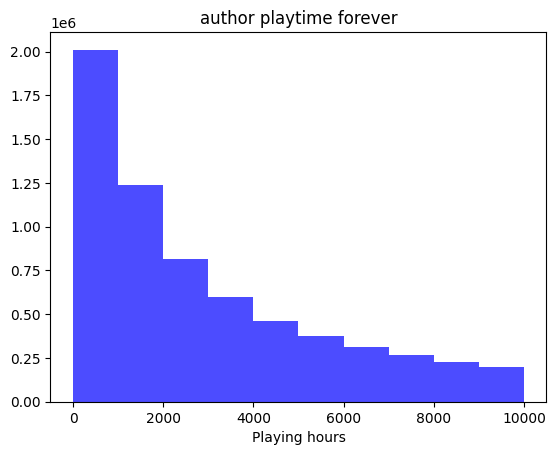

In [19]:
plt.hist(steam_data[steam_data["author.playtime_forever"]<10000]["author.playtime_forever"], bins=10, alpha=0.7, color='blue')
plt.xlabel('Playing hours')
plt.title("author playtime forever") 

## drop NA in author.playtime_last_two_weeks

In [20]:
steam_data["author.playtime_last_two_weeks"].isna().sum()

0

In [21]:
print("the game is not play recently for each review "+ str(len(steam_data[steam_data["author.playtime_last_two_weeks"] == 0]["author.playtime_last_two_weeks"])))

the game is not play recently for each review 7699367


(array([394841.,  31438.,   5388.,   2200.,    652.]),
 array([ 1001. ,  5551.6, 10102.2, 14652.8, 19203.4, 23754. ]),
 <BarContainer object of 5 artists>)

Text(0.5, 0, 'Playing hours')

Text(0.5, 1.0, 'author playtime_last_two_weeks')

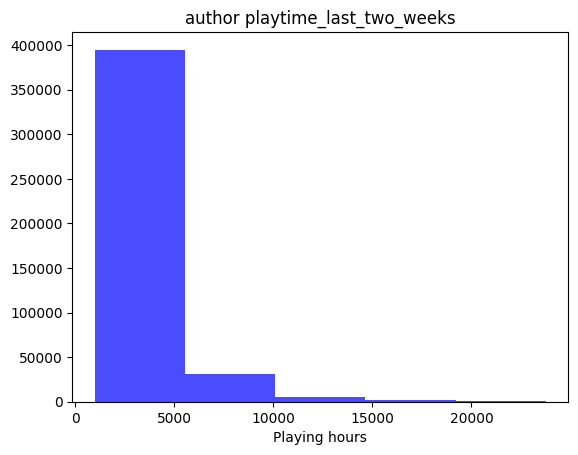

In [22]:
plt.hist(steam_data[steam_data["author.playtime_last_two_weeks"]>1000]["author.playtime_last_two_weeks"], bins=5, alpha=0.7, color='blue')
plt.xlabel('Playing hours')
plt.title("author playtime_last_two_weeks") 

## Fill the NA in the author.playtime_at_review by regression

In [23]:
steam_data["author.playtime_at_review"].isna().sum()

11832

In [24]:
steam_data[steam_data["author.playtime_at_review"].notna()].head(10)

,Unnamed: 0,app_id,app_name,review_id,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85184605,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,1,292030,The Witcher 3: Wild Hunt,85184171,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
2,2,292030,The Witcher 3: Wild Hunt,85184064,"dis gud,",1611379091,1611379091,True,0,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,3,292030,The Witcher 3: Wild Hunt,85180436,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
4,4,292030,The Witcher 3: Wild Hunt,85179753,Why wouldn't you get this,1611371978,1611371978,True,0,0,...,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09
5,5,292030,The Witcher 3: Wild Hunt,85179400,it is ok\n,1611371392,1611371392,True,0,0,...,True,False,False,76561198284845223,60,9,2518.0,242.0,2518.0,1.611371e+09
6,6,292030,The Witcher 3: Wild Hunt,85179341,worth\n,1611371318,1611371318,True,0,0,...,True,False,False,76561198370568524,59,5,553.0,35.0,517.0,1.611374e+09
7,7,292030,The Witcher 3: Wild Hunt,85178164,Isn't Geralt hot enough to get both Yennefer a...,1611369478,1611369478,True,0,0,...,True,False,False,76561198040150323,51,37,165.0,0.0,165.0,1.437876e+09
8,8,292030,The Witcher 3: Wild Hunt,85177892,"Very Fun, Would play again!",1611369121,1611369121,True,0,0,...,True,False,False,76561198040190687,54,1,20168.0,75.0,20092.0,1.611374e+09
9,9,292030,The Witcher 3: Wild Hunt,85174926,The game is enjoyable enough but...\n-Combat h...,1611364401,1611364470,True,0,0,...,True,False,False,76561198020027165,208,105,497.0,370.0,398.0,1.611370e+09


In [25]:
steam_data[steam_data["author.playtime_at_review"].isna()].head(10)

,Unnamed: 0,app_id,app_name,review_id,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
81551,81551,292030,The Witcher 3: Wild Hunt,47880079,Waiting for that pc\n\nEdit: PC Acquired,1545952859,1575930054,True,0,0,...,True,False,False,76561198161620775,88,68,1100.0,0.0,NaN,1.593969e+09
81582,81582,292030,The Witcher 3: Wild Hunt,47862711,no,1545910440,1545910440,False,0,3,...,True,False,False,76561198321395122,44,2,43.0,0.0,NaN,1.545907e+09
97669,97669,292030,The Witcher 3: Wild Hunt,38976633,Only posting this due to the overwhelmingly Fa...,1514905997,1514905997,False,2,2,...,True,False,False,76561197970084711,265,3,86.0,0.0,NaN,1.514905e+09
102075,102075,292030,The Witcher 3: Wild Hunt,37264327,Played a couple of hundred hours or so offline...,1511498788,1511498788,True,0,0,...,True,False,False,76561198106975733,272,24,8050.0,0.0,NaN,1.585388e+09
106344,106344,292030,The Witcher 3: Wild Hunt,35884442,A known bug causes the sound to stutter consta...,1508573284,1508573284,False,0,1,...,True,False,False,76561197983616316,207,10,3788.0,0.0,NaN,1.555352e+09
109978,109978,292030,The Witcher 3: Wild Hunt,33253786,The best game on the Earth! You must play it. ...,1499212931,1499212931,True,1,0,...,True,False,False,76561198049636683,78,6,549.0,0.0,NaN,1.578841e+09
112039,112039,292030,The Witcher 3: Wild Hunt,32206125,This was not considered game of the year by mi...,1496689270,1542834448,True,0,0,...,True,False,False,76561198118643548,167,11,653.0,0.0,NaN,1.557010e+09
113777,113777,292030,The Witcher 3: Wild Hunt,31272195,Best Game Ever!. Awesome stories with Black an...,1492769796,1492769796,True,0,0,...,True,False,False,76561198170213063,48,5,7793.0,0.0,NaN,1.580311e+09
115604,115604,292030,The Witcher 3: Wild Hunt,30206082,This is how a game should be.,1488142628,1488142628,True,0,0,...,True,False,False,76561198202404184,496,56,42.0,0.0,NaN,1.598041e+09
116456,116456,292030,The Witcher 3: Wild Hunt,29638469,Won't open up game \n,1485992516,1485992516,False,6,2,...,True,False,False,76561198298161996,18,1,2022.0,0.0,NaN,1.506663e+09


In [26]:
steam_data.dtypes

Unnamed: 0                          int64
app_id                              int64
app_name                           object
review_id                           int64
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful                       int64
votes_funny                         int64
weighted_vote_score               float64
comment_count                       int64
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
author.steamid                      int64
author.num_games_owned              int64
author.num_reviews                  int64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object

### Use Random Forest Regression Model to fill the NA in author.playtime_at_review

In [27]:
# select the useful columns for regression and get dummy variables

reg_col = ["recommended","votes_helpful","votes_funny","weighted_vote_score","comment_count","steam_purchase",
           "received_for_free","written_during_early_access","author.num_games_owned","author.num_reviews",
           "author.playtime_forever","author.playtime_last_two_weeks","author.last_played","author.playtime_at_review"]
reg_data = steam_data[reg_col]
reg_data = pd.get_dummies(reg_data, columns=['steam_purchase', 'received_for_free','written_during_early_access'\
                                             ,'recommended'], dummy_na=True)
reg_data.head(5)

,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.last_played,author.playtime_at_review,...,steam_purchase_nan,received_for_free_False,received_for_free_True,received_for_free_nan,written_during_early_access_False,written_during_early_access_True,written_during_early_access_nan,recommended_False,recommended_True,recommended_nan
0,0,0,0.0,0,5,3,5587.0,3200.0,1.611384e+09,5524.0,...,False,True,False,False,True,False,False,False,True,False
1,0,0,0.0,0,11,1,823.0,823.0,1.611379e+09,823.0,...,False,True,False,False,True,False,False,False,True,False
2,0,0,0.0,0,27,2,4192.0,3398.0,1.611352e+09,4192.0,...,False,True,False,False,True,False,False,False,True,False
3,0,0,0.0,0,33,1,23329.0,177.0,1.611219e+09,23329.0,...,False,True,False,False,True,False,False,False,True,False
4,0,0,0.0,0,131,2,8557.0,2004.0,1.611371e+09,8557.0,...,False,True,False,False,True,False,False,False,True,False


In [28]:
# Split train test by isna and notna
X_train = reg_data[reg_data["author.playtime_at_review"].notna()]


# Randomly sample 30% of rows from the DataFrame
X_train = X_train.sample(n= int(len(X_train)*0.3), random_state=42)

Y_train = X_train["author.playtime_at_review"]
X_train.drop("author.playtime_at_review",inplace=True,axis=1)

X_test = reg_data[reg_data["author.playtime_at_review"].isna()]
X_test.drop("author.playtime_at_review",inplace=True,axis=1)

C:\Users\anson\AppData\Local\Temp\ipykernel_20548\3236685695.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop("author.playtime_at_review",inplace=True,axis=1)


In [29]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 10],  # Adjust the depth values based on your needs
    'n_estimators': [10, 100, 200],  # You can also tune other parameters, like the number of trees
}

# Create and train a random forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=10)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Predict the missing values using the best model
best_model = grid_search.best_estimator_
predicted_values = best_model.predict(X_test)

# Identify missing values
missing_values = steam_data.isnull().any(axis=1)
# Fill in the missing values with the predicted values
steam_data.loc[missing_values, 'author.playtime_at_review'] = predicted_values

best_mae = -grid_search.best_score_  

# the best MAE value using:
print("Best Mean Absolute Error:", best_mae)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [10, 100, 200]})

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Best Mean Absolute Error: -0.752115941211704


In [37]:
# compare the MAE with Y's std to see how relative small that our MAE is
Y_train.std()

26475.21105533731

In [30]:
# Write the DataFrame to a CSV file
steam_data.to_csv("steam_data_clean2.csv", index=False)

In [33]:
# Save the model to a file
filename = 'random_forest_model.joblib'
joblib.dump(best_model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

['random_forest_model.joblib']

### plot_tree

<Figure size 2000x1000 with 0 Axes>

[Text(0.5712347765989241, 0.9545454545454546, 'author.playtime_forever <= 93910.5\nsquared_error = 703842290.328\nsamples = 1810998\nvalue = 9186.122'),
 Text(0.30415047818290497, 0.8636363636363636, 'author.playtime_forever <= 30011.5\nsquared_error = 126715088.887\nsamples = 1752444\nvalue = 6164.684'),
 Text(0.1529157949790795, 0.7727272727272727, 'author.playtime_forever <= 10219.5\nsquared_error = 22293493.134\nsamples = 1561216\nvalue = 3381.162'),
 Text(0.07650926479378362, 0.6818181818181818, 'author.playtime_forever <= 4046.5\nsquared_error = 3729684.297\nsamples = 1237912\nvalue = 1735.983'),
 Text(0.03825463239689181, 0.5909090909090909, 'author.playtime_forever <= 1732.5\nsquared_error = 734190.142\nsamples = 885635\nvalue = 933.727'),
 Text(0.019127316198445904, 0.5, 'author.playtime_forever <= 725.5\nsquared_error = 160666.871\nsamples = 560896\nvalue = 515.17'),
 Text(0.009563658099222952, 0.4090909090909091, 'author.playtime_forever <= 324.5\nsquared_error = 34626.748\n

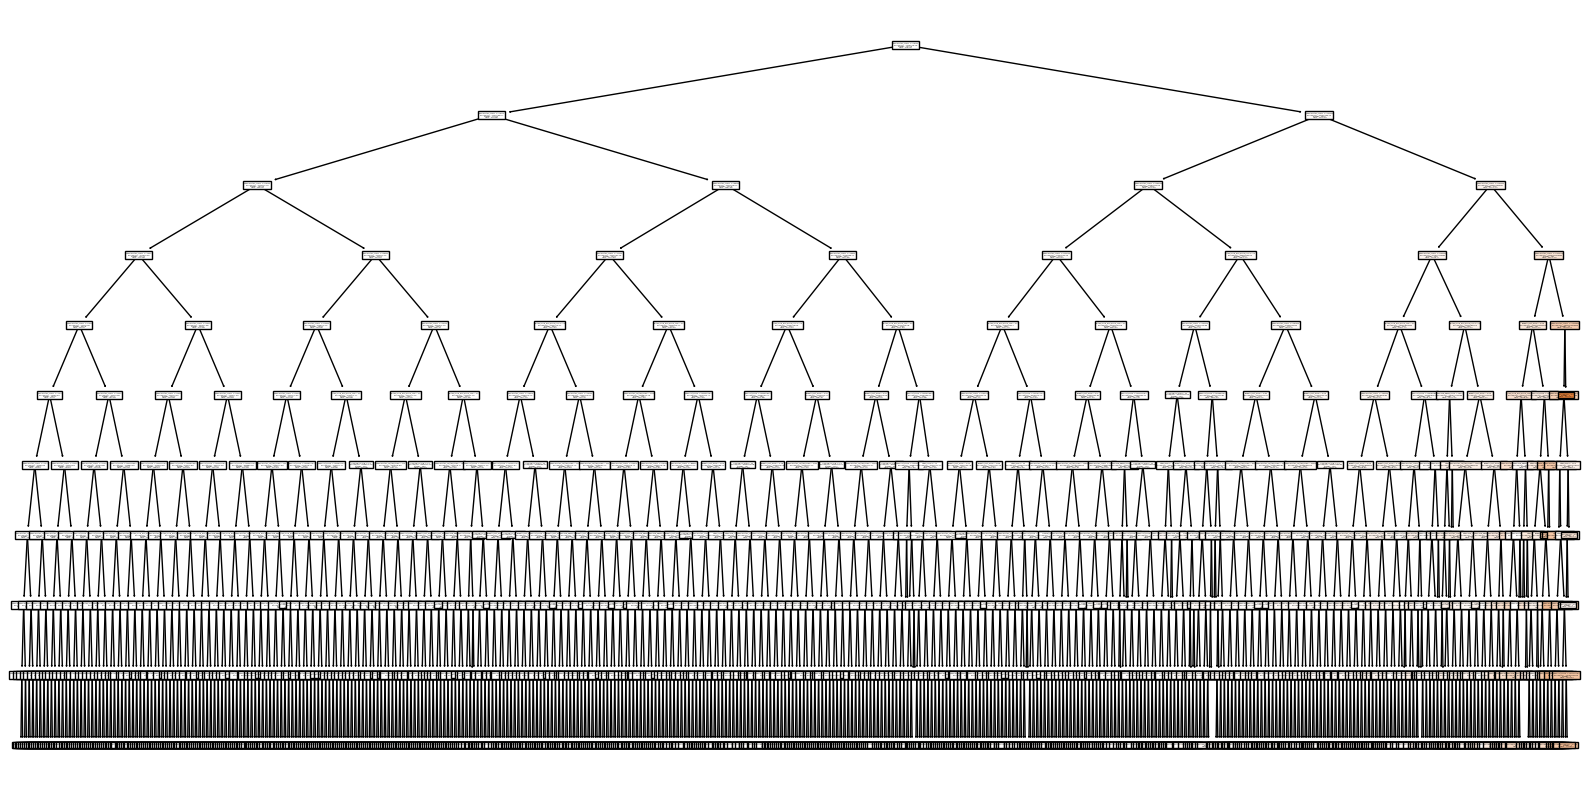

In [35]:
# Assuming rf_model is your trained Random Forest model
# You can choose which tree to plot (e.g., rf_model.estimators_[0])
plt.figure(figsize=(20, 10))
plot_tree(loaded_model .estimators_[0], feature_names=X_train.columns,\
           class_names=[str(s) for s in Y_train.unique()], filled=True)
plt.show()

### importance of feature

<BarContainer object of 21 artists>

([<matplotlib.axis.YTick at 0x2c6b552f500>,
 [Text(0, 0, 'recommended_nan'),
  Text(0, 1, 'written_during_early_access_nan'),
  Text(0, 2, 'received_for_free_nan'),
  Text(0, 3, 'steam_purchase_nan'),
  Text(0, 4, 'received_for_free_False'),
  Text(0, 5, 'received_for_free_True'),
  Text(0, 6, 'steam_purchase_False'),
  Text(0, 7, 'steam_purchase_True'),
  Text(0, 8, 'recommended_True'),
  Text(0, 9, 'recommended_False'),
  Text(0, 10, 'votes_funny'),
  Text(0, 11, 'comment_count'),
  Text(0, 12, 'votes_helpful'),
  Text(0, 13, 'author.num_reviews'),
  Text(0, 14, 'author.num_games_owned'),
  Text(0, 15, 'author.last_played'),
  Text(0, 16, 'written_during_early_access_False'),
  Text(0, 17, 'written_during_early_access_True'),
  Text(0, 18, 'author.playtime_last_two_weeks'),
  Text(0, 19, 'weighted_vote_score'),
  Text(0, 20, 'author.playtime_forever')])

Text(0.5, 0, 'Feature Importance')

Text(0.5, 1.0, 'Random Forest Feature Importance')

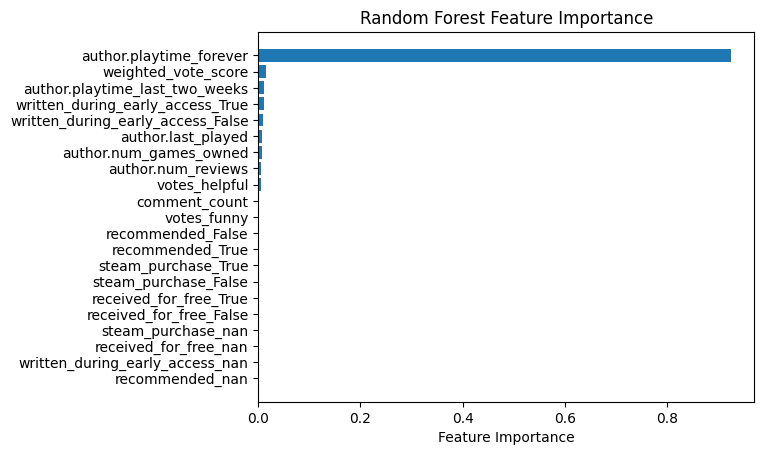

In [38]:
# Assuming rf_model is your trained Random Forest model
feature_importances = loaded_model.feature_importances_
feature_names = X_train.columns  # Replace with your feature names
sorted_idx = feature_importances.argsort()

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx])
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Random Forest models provide a feature importance score for each feature in the dataset. 
# visualize these scores to understand which features are more influential in making predictions.

In [27]:
steam_data.isna().any()

steam_data.shape

Unnamed: 0                        False
app_id                            False
app_name                          False
review_id                         False
review                            False
timestamp_created                 False
timestamp_updated                 False
recommended                       False
votes_helpful                     False
votes_funny                       False
weighted_vote_score               False
comment_count                     False
steam_purchase                    False
received_for_free                 False
written_during_early_access       False
author.steamid                    False
author.num_games_owned            False
author.num_reviews                False
author.playtime_forever           False
author.playtime_last_two_weeks    False
author.playtime_at_review         False
author.last_played                False
dtype: bool

(9563752, 22)

# Classification for predict the recommended

In [30]:
# read the clean data
steam_data = pd.read_csv("steam_data_clean2.csv")

In [5]:
steam_data.head()

,Unnamed: 0,app_id,app_name,review_id,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85184605,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,1,292030,The Witcher 3: Wild Hunt,85184171,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
2,2,292030,The Witcher 3: Wild Hunt,85184064,"dis gud,",1611379091,1611379091,True,0,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,3,292030,The Witcher 3: Wild Hunt,85180436,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
4,4,292030,The Witcher 3: Wild Hunt,85179753,Why wouldn't you get this,1611371978,1611371978,True,0,0,...,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09


## Uterlize the categorical data, which contain more than 10 kinds of category, and extract valuable information

### count the word in the review

In [31]:
# count the words in review:
review = steam_data.review

review_count_word =  [len(words.split()) for words in review]
steam_data["review_count_word"] = review_count_word

In [47]:
steam_data["review_count_word"] .head(10)

0    12
1     7
2     2
3    11
4     5
5     3
6     1
7    19
8     5
9    93
Name: review_count_word, dtype: int64

### Calculate the frequency of the game

In [32]:
freq_game = steam_data.app_name.value_counts()/(len(steam_data))

# Convert the series to a dictionary
freq_game = freq_game.to_dict()
freq_game

# Use map to create freq_game in dataset with corresponding values from the freq_game dictionary
steam_data['freq_game'] = steam_data.app_name.map(freq_game)

steam_data['freq_game'].head()

0    0.015812
1    0.015812
2    0.015812
3    0.015812
4    0.015812
Name: freq_game, dtype: float64

### Calculate the frequency of the author

In [33]:
freq_author = steam_data["author.steamid"].value_counts()/(len(steam_data))

# Convert the series to a dictionary
freq_author = freq_author.to_dict()
freq_author

# Use map to create freq_game in dataset with corresponding values from the freq_game dictionary
steam_data['freq_author'] = steam_data["author.steamid"].map(freq_author)

steam_data['freq_author'].head()

0    1.045615e-07
1    1.045615e-07
2    2.091229e-07
3    1.045615e-07
4    1.045615e-07
Name: freq_author, dtype: float64

In [62]:
steam_data.dtypes

Unnamed: 0                          int64
app_id                              int64
app_name                           object
review_id                           int64
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful                       int64
votes_funny                         int64
weighted_vote_score               float64
comment_count                       int64
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
author.steamid                      int64
author.num_games_owned              int64
author.num_reviews                  int64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
review_count_word                   int64
freq_game                         

## Random Forest Model for classification on recommended

In [34]:
# select the useful columns for regression and get dummy variables

clas_data = steam_data.drop(columns=["app_id","app_name","review_id","review","author.steamid","Unnamed: 0"])
clas_data = pd.get_dummies(clas_data, columns=['steam_purchase', 'received_for_free',\
                                             'written_during_early_access'], dummy_na=True)
clas_data.head(5)

,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,...,freq_author,steam_purchase_False,steam_purchase_True,steam_purchase_nan,received_for_free_False,received_for_free_True,received_for_free_nan,written_during_early_access_False,written_during_early_access_True,written_during_early_access_nan
0,1611379970,1611379970,True,0,0,0.0,0,5,3,5587.0,...,1.045615e-07,False,True,False,True,False,False,True,False,False
1,1611379264,1611379264,True,0,0,0.0,0,11,1,823.0,...,1.045615e-07,False,True,False,True,False,False,True,False,False
2,1611379091,1611379091,True,0,0,0.0,0,27,2,4192.0,...,2.091229e-07,False,True,False,True,False,False,True,False,False
3,1611373086,1611373086,True,0,0,0.0,0,33,1,23329.0,...,1.045615e-07,False,True,False,True,False,False,True,False,False
4,1611371978,1611371978,True,0,0,0.0,0,131,2,8557.0,...,1.045615e-07,False,True,False,True,False,False,True,False,False


In [35]:
# train test split

# Randomly sample 30% of rows from the DataFrame
clas_data = clas_data.sample(n= int(len(clas_data)*0.3), random_state=42)

X = clas_data.drop(["recommended"],axis = 1)
Y = clas_data.recommended

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y, test_size =0.3, random_state=0)

In [14]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 10],  # Adjust the depth values based on your needs
    'n_estimators': [10, 100, 200],  # You can also tune other parameters, like the number of trees
}

# Create and train a random forest regression model
rf_model2 = RandomForestClassifier(random_state=42,n_jobs=-1)

# Perform grid search with cross-validation
grid_search2 = GridSearchCV(rf_model2, param_grid, cv=10)
grid_search2.fit(X_train2, Y_train2)

# Get the best hyperparameters
best_params2 = grid_search2.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params2)

# Predict the missing values using the best model
best_model2 = grid_search2.best_estimator_
Y_pred = best_model2.predict(X_test2)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}


In [21]:
# Save the model to a file
filename = 'random_forest_model2.joblib'
joblib.dump(best_model2, filename)

# Load the model from the file
loaded_model2 = joblib.load(filename)

In [23]:
Y_pred2 = loaded_model2.predict(X_test2)

### Metrics for evaluating our model

In [24]:
# Confusion matrix
pd.DataFrame(confusion_matrix(Y_test2,Y_pred2))


,0,1
0,33710,60816
1,5814,760398


In [25]:
# Accuracy
met.accuracy_score(Y_test2,Y_pred2)

0.9225896846659495

In [26]:
# Precision: Out of the retrieved elements, how many are actually positive?
met.precision_score(Y_test2,Y_pred2)

0.9259437856636638

In [27]:
# Recall: Among the relevant elements, how many did I retrieve?
met.recall_score(Y_test2,Y_pred2)

0.992412021738109

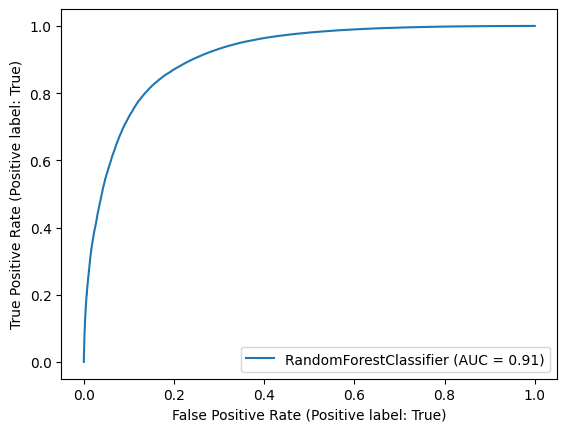

In [28]:
# ROC (Receiving Operator Characteristic) Curve
met.RocCurveDisplay.from_estimator(loaded_model2, X_test2,Y_test2)

In [29]:
# AUC score
Y_pred_prob2 = loaded_model2.predict_proba(X_test2)[:,1]

met.roc_auc_score(Y_test2,Y_pred_prob2)

0.9126850479866959

### importance of feature

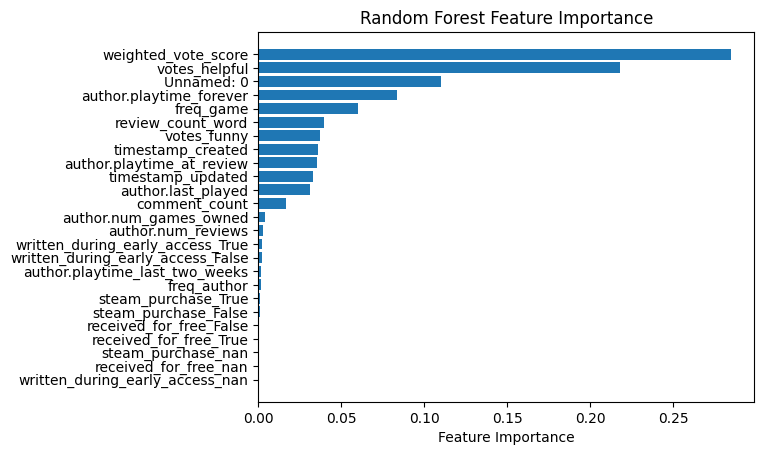

In [22]:
# Assuming rf_model is your trained Random Forest model
feature_importances = loaded_model2.feature_importances_
feature_names = X_train2.columns  # Replace with your feature names
sorted_idx = feature_importances.argsort()

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx])
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Random Forest models provide a feature importance score for each feature in the dataset. 
# visualize these scores to understand which features are more influential in making predictions.